In [98]:
# Load packages and import camping_revenue_97_17
library(forecast)
library(ggplot2)
library(tidyr)
library(dygraphs)
library(htmlwidgets)
library(rmarkdown)
revenue <- read.csv("camping_revenue_97_17.csv",
    header = F,
    quote = "'", # For single quotes if applicable
    stringsAsFactors = F
)
print(head(revenue))

Warning message:
"package 'rmarkdown' was built under R version 4.4.1"


  V1         V2
1 "1 ""16857"""
2 "2 ""14209"""
3 "3 ""15513"""
4 "4 ""16415"""
5 "5 ""19047"""
6 "6 ""20655"""


In [89]:
# Process and have all relevant data in data column
class(revenue$V1)
revenue <- separate(revenue,
    col = V2,
    sep = c(2, -3),
    into = c("rest", "data", "rest2")
)
print(head(revenue))

[1] "character"

  V1 rest  data rest2
1 "1   "" 16857   """
2 "2   "" 14209   """
3 "3   "" 15513   """
4 "4   "" 16415   """
5 "5   "" 19047   """
6 "6   "" 20655   """


In [90]:
# conversion to time series
myts <- ts(as.numeric(revenue$data),
    start = 1997, frequency = 12
)

# data still contains NA values
summary(myts)

Warning message in is.data.frame(data):
"NAs introduced by coercion"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      3   18980   23218   36912   26816 3334333       4 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14209   19280   23267   23282   26658   34366 

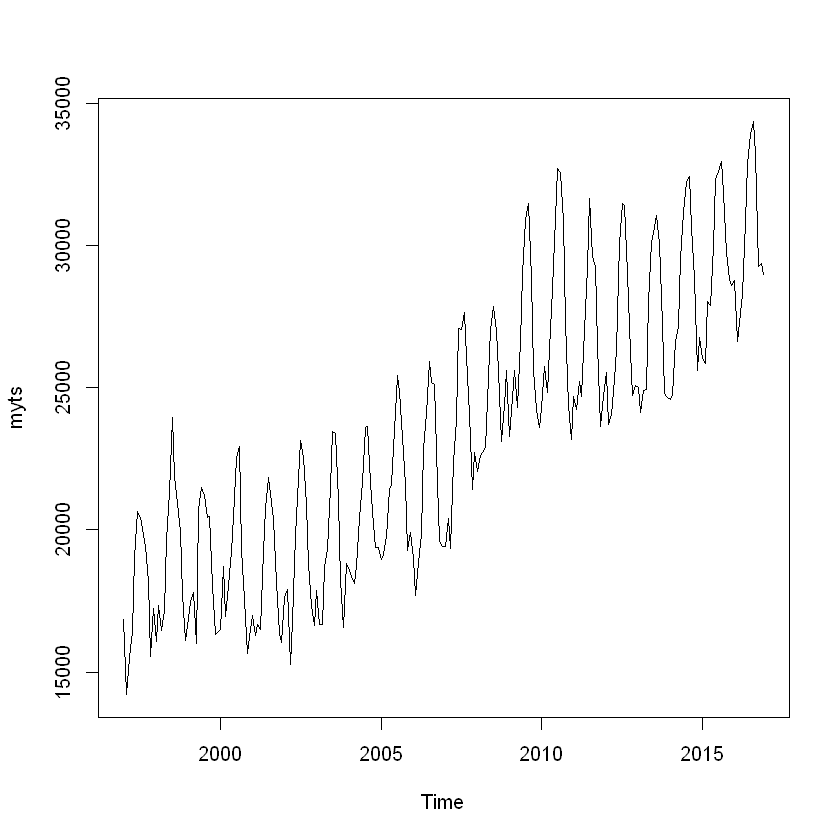

In [91]:
# Use tsclean to clean the data
myts <- tsclean(myts)
summary(myts)
plot(myts)

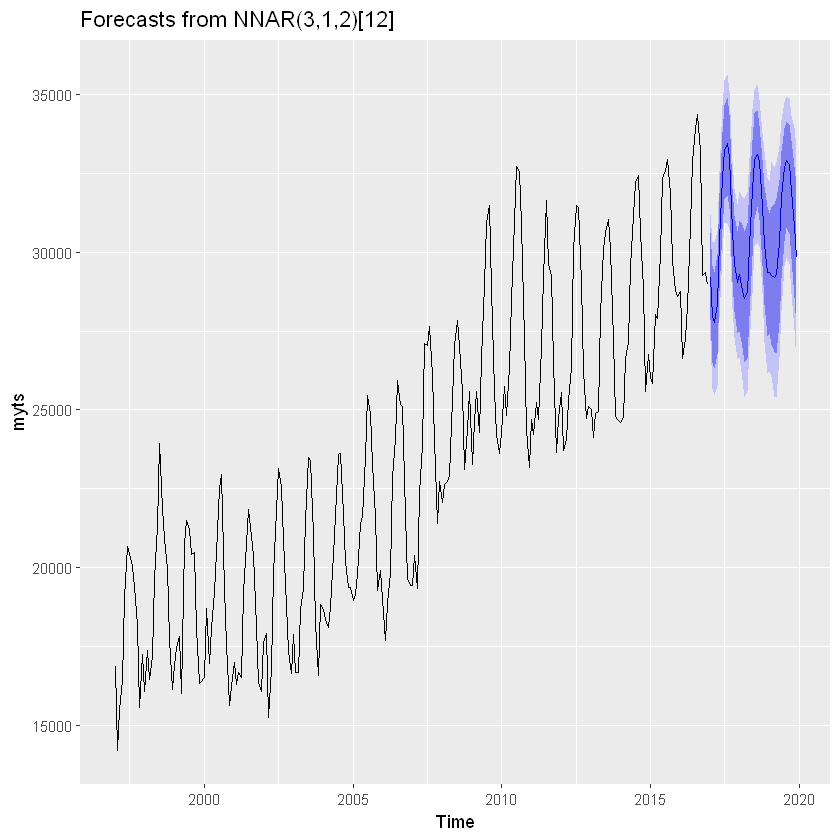

In [86]:
# set up a Neural Network model and plot forecast of 3 years
mynnetar <- nnetar(myts)
nnetforecast <- forecast(mynnetar,
    h = 36,
    # Prediction intervals = True
    PI = T
)
autoplot(nnetforecast)

In [ ]:
# create interactive graph with dygraphs
data <- nnetforecast$x
# upper and lower bounds
lower <- nnetforecast$lower[, 2]
upper <- nnetforecast$upper[, 2]
# prediction
pforecast <- nnetforecast$mean

mydata <- cbind(
    data, lower, upper,
    pforecast
)

saveWidget(
    dygraph(mydata, main = "Oregon Campsite Restaurant") %>%
        dyRangeSelector() %>%
        dySeries(name = "data", label = "Revenue Data") %>%
        dySeries(c("lower", "pforecast", "upper"), label = "Revenue Forecast") %>%
        dyLegend(show = "always", hideOnMouseOut = FALSE) %>%
        dyAxis("y", label = "Monthly Revenue USD") %>%
        dyHighlight(
            highlightCircleSize = 5,
            highlightSeriesOpts = list(strokeWidth = 2)
        ) %>%
        dyOptions(axisLineColor = "navy", gridLineColor = "grey") %>%
        dyAnnotation("2010-8-1", text = "CF", tooltip = "Camp Festival", attachAtBottom = T),
    file = "Oregon Campsite Restaurant Forecast.html"
)